# Analyze the loss based on the simulations runtime

In [2]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

os.environ['JAX_PLATFORM_NAME'] = "cpu"
os.environ['JAX_PLATFORMS'] = "cpu"

In [3]:
import jax.numpy as jnp
import jax

import numpy as onp

import matplotlib.pyplot as plt

from simulation.simulate_full import run_entire_simulation

import analyzers.loss as loss_anaylzer
import analyzers.database as database

/home/florian/anaconda3/envs/jaxidp/lib/python3.11/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


In [3]:
scan_space = jnp.linspace(3.0000, 3.0001, 8)
runtime_values = onp.array([12, 20, 28, 36, 44, 52, 60, 68, 76, 84, 92, 100, 108, 116, 124, 132, 140, 148, 156])
steps = runtime_values * 1000 // 2

In [4]:
def get_sim_result(lj_sigma_oo, runtime):
    return run_entire_simulation(lj_sigma_oo, runtime, 6, 100, 100, 1)

In [4]:
database.set_filename("../data/loss_analyzer/runtime_scan.npz")

Calculate losses over the scan space for each runtime from the array

In [ ]:
all_losses = []

for n_steps in steps:
    existing_keys = database.get_existing_keys()
    if n_steps in existing_keys:
        print(f"Skipping {n_steps}, was already computed")
        continue

    print(f"=== Running for {n_steps} steps ({n_steps // 500}ps) ===")
    reference = get_sim_result(3.188, n_steps)
    losses = []
    for lj_sigma_oo in scan_space:
        pattern = get_sim_result(lj_sigma_oo, n_steps)
        loss = loss_anaylzer.L1_loss(pattern, reference)
        losses.append(loss)
        
    jitter = loss_anaylzer.get_loss_jitter(losses)
    print(f"Jitter: {jitter}")

    database.save_intermediate_result(n_steps, losses)

Skipping 6000, was already computed
Skipping 10000, was already computed
Skipping 14000, was already computed
Skipping 18000, was already computed
Skipping 22000, was already computed
Skipping 26000, was already computed
Skipping 30000, was already computed
Skipping 34000, was already computed
Skipping 38000, was already computed
Skipping 42000, was already computed
Skipping 46000, was already computed
Skipping 50000, was already computed
Skipping 54000, was already computed
=== Running for 58000 steps (116ps) ===


# Plot
Skip previous if data is already available

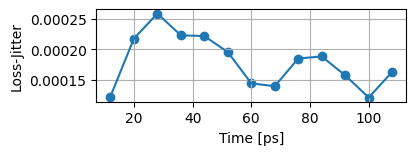

In [6]:
keys, values = database.load_result()
jitter_values = [loss_anaylzer.get_loss_jitter(v) for v in values]

plt.plot(keys / 500, jitter_values)
plt.scatter(keys / 500, jitter_values)
plt.xlabel("Time [ps]")
plt.ylabel("Loss-Jitter")

plt.gcf().set_size_inches(4, 1.2)
plt.grid()
plt.savefig("../plots/analysis_loss_runtime.svg")
plt.show()